<h2>Modeling FMO complex using HEOM: A seven level system</h2>
The FMO complex is of great interest to both experimental and theoretical chemists because it is a small and simple eletron transfer system. Here, we use HEOM to simulate the population dynamics using parameters provided by previous work$^1$. 

In [6]:
import time
import cmath
import sys
import cmath
import math
import os
import h5py
import matplotlib.pyplot as plt

import numpy as np

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
from libra_py import data_read
import libra_py.dynamics.heom.compute as compute
from libra_py import ft


plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red
colors.update({"12": "#FF4500"})  # orangered
colors.update({"13": "#B22222"})  # firebrick
colors.update({"14": "#DC143C"})  # crimson

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

In [4]:
Ham = CMATRIX(7,7)
Ham.set(0, 0, 410.0);    Ham.set(0, 1, -87.7);      Ham.set(0, 2, 5.5);        Ham.set(0, 3, -5.9);       Ham.set(0, 4, 6.7);      Ham.set(0, 5, -13.7);    Ham.set(0, 6, -9.9);
Ham.set(1, 0, -87.7);    Ham.set(1, 1, 530.0);      Ham.set(1, 2, 30.8);       Ham.set(1, 3, 8.2);        Ham.set(1, 4, 0.7);      Ham.set(1, 5, 11.8);     Ham.set(1, 6, 4.3);
Ham.set(2, 0, 5.5);      Ham.set(2, 1,  30.8);      Ham.set(2, 2, 210.0);      Ham.set(2, 3, -53.5);      Ham.set(2, 4, -2.2);     Ham.set(2, 5, -9.6);     Ham.set(2, 6, 6.0);
Ham.set(3, 0, -5.9);     Ham.set(3, 1, 8.2);        Ham.set(3, 2, -53.5);      Ham.set(3, 3, 320.0);      Ham.set(3, 4, -70.7);    Ham.set(3, 5, -17.0);    Ham.set(3, 6, -63.3);
Ham.set(4, 0, 6.7);      Ham.set(4, 1, 0.7);        Ham.set(4, 2, -2.2);       Ham.set(4, 3, -70.7);      Ham.set(4, 4, 480.0);    Ham.set(4, 5, 81.1);     Ham.set(4, 6, -1.3);
Ham.set(5, 0, 13.7);     Ham.set(5, 1,  11.8);      Ham.set(5, 2, -9.6);       Ham.set(5, 3, -17.0);      Ham.set(5, 4, 81.1);     Ham.set(5, 5, 630.0);    Ham.set(5, 6, 39.7);
Ham.set(6, 0, -9.9);     Ham.set(6, 1,  4.3);       Ham.set(6, 2, 6.0);        Ham.set(6, 3, -63.3);      Ham.set(6, 4, -1.3);     Ham.set(6, 5, 39.7);     Ham.set(6, 6, 440.0);
Ham.scale(-1,-1, units.inv_cm2Ha*(1.0+0.0j))

rho = CMATRIX(7,7)
rho.set(0, 0, 1.0+0.0j)

params = { "KK":1, "LL":5,
           "gamma": 0.02/(1 * units.fs2au),
           "eta": 35.0 * units.inv_cm2Ha,
           "temperature": 77.0,
           "el_phon_couplings":initialize_el_phonon_couplings(7),

           "dt":1*units.fs2au, "nsteps":1000,
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":1,"do_zeroing":1,
           "num_threads":12,

           "prefix":"out_T1",
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

In [5]:
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 100
 step= 200
 step= 300
 step= 400
 step= 500
 step= 600
 step= 700
 step= 800
 step= 900
Calculations took 350.4670259952545 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

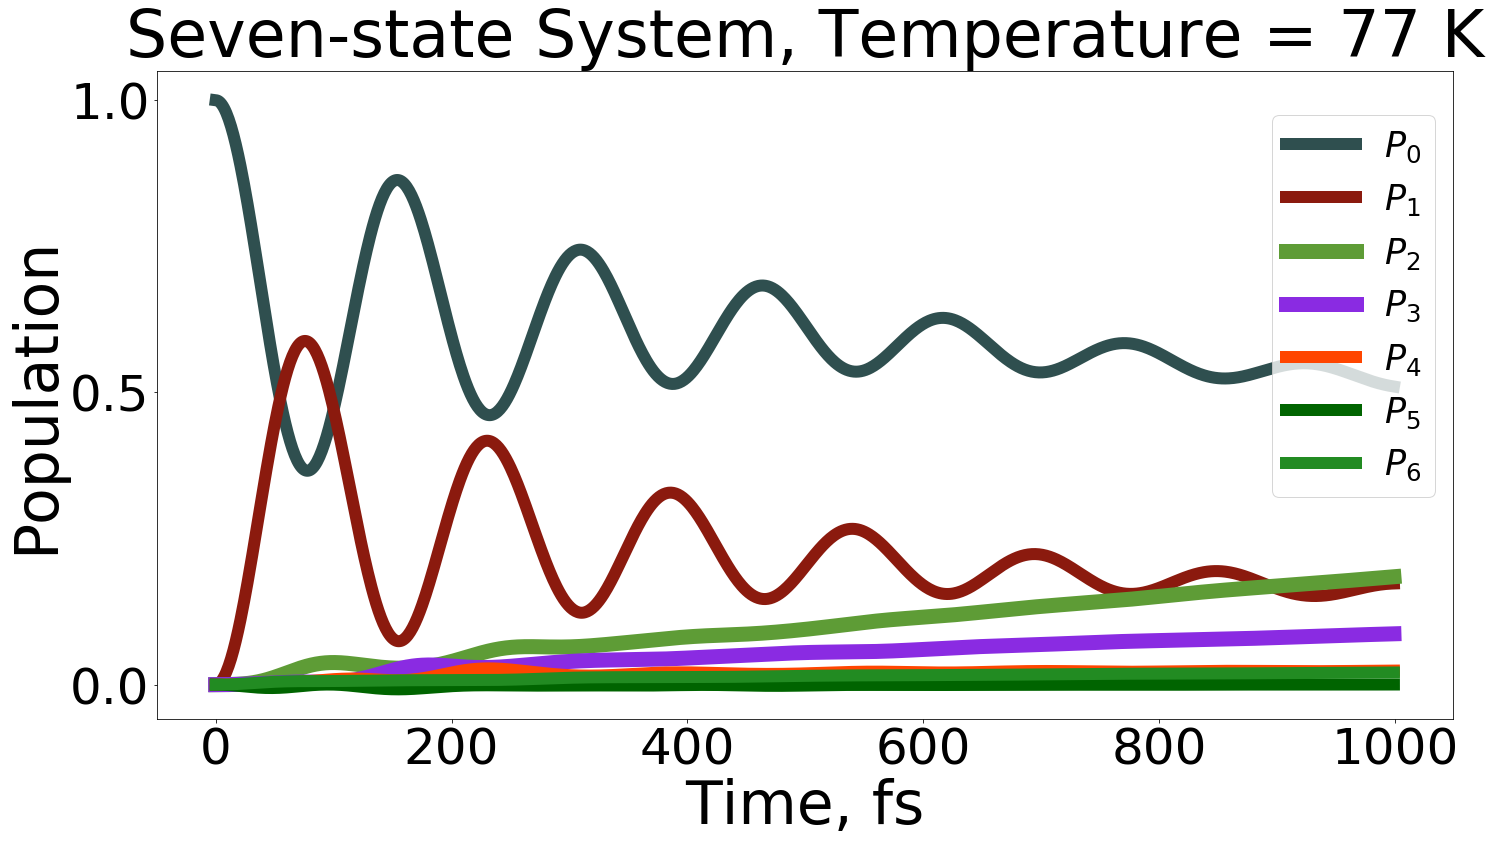

In [7]:
A = [ None, None ]

with h5py.File(F"out_T1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"out_T1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 1,1])

C = [ None, None ]

with h5py.File(F"out_T1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 2,2])

D = [ None, None ]

with h5py.File(F"out_T1/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 3,3])

E = [ None, None ]

with h5py.File(F"out_T1/mem_data.hdf", 'r') as f:
    E[0] = list(f["time/data"][:] * units.au2fs)
    E[1] = list(f["denmat/data"][:, 4,4])

F = [ None, None ]

with h5py.File(F"out_T1/mem_data.hdf", 'r') as f:
    F[0] = list(f["time/data"][:] * units.au2fs)
    F[1] = list(f["denmat/data"][:, 5,5])

G = [ None, None ]

with h5py.File(F"out_T1/mem_data.hdf", 'r') as f:
    G[0] = list(f["time/data"][:] * units.au2fs)
    G[1] = list(f["denmat/data"][:, 6,6])

plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Seven-state System, Temperature = 77 K', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"$P_0$", linewidth=12, color = colors["41"])
plt.plot(B[0], B[1], label=f"$P_1$", linewidth=12, color = colors["11"], )
plt.plot(C[0], C[1], label=f"$P_2$", linewidth=15, color = colors["21"], )
plt.plot(D[0], D[1], label=f"$P_3$", linewidth=15, color = colors["31"], )
plt.plot(E[0], E[1], label=f"$P_4$", linewidth=12, color = colors["12"])
plt.plot(F[0], F[1], label=f"$P_5$", linewidth=12, color = colors["22"], )
plt.plot(G[0], G[1], label=f"$P_6$", linewidth=12, color = colors["23"], )
plt.legend(fontsize=35, loc='upper right', bbox_to_anchor=(1, 0.959))
plt.yticks(ticks=(0.0, 0.5, 1.0))
plt.show()
plt.close()

Change the temperature to model physiological conditions 

In [6]:
params.update({"temperature":300, "prefix":"out_T2"})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 100
 step= 200
 step= 300
 step= 400
 step= 500
 step= 600
 step= 700
 step= 800
 step= 900
Calculations took 305.72155952453613 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

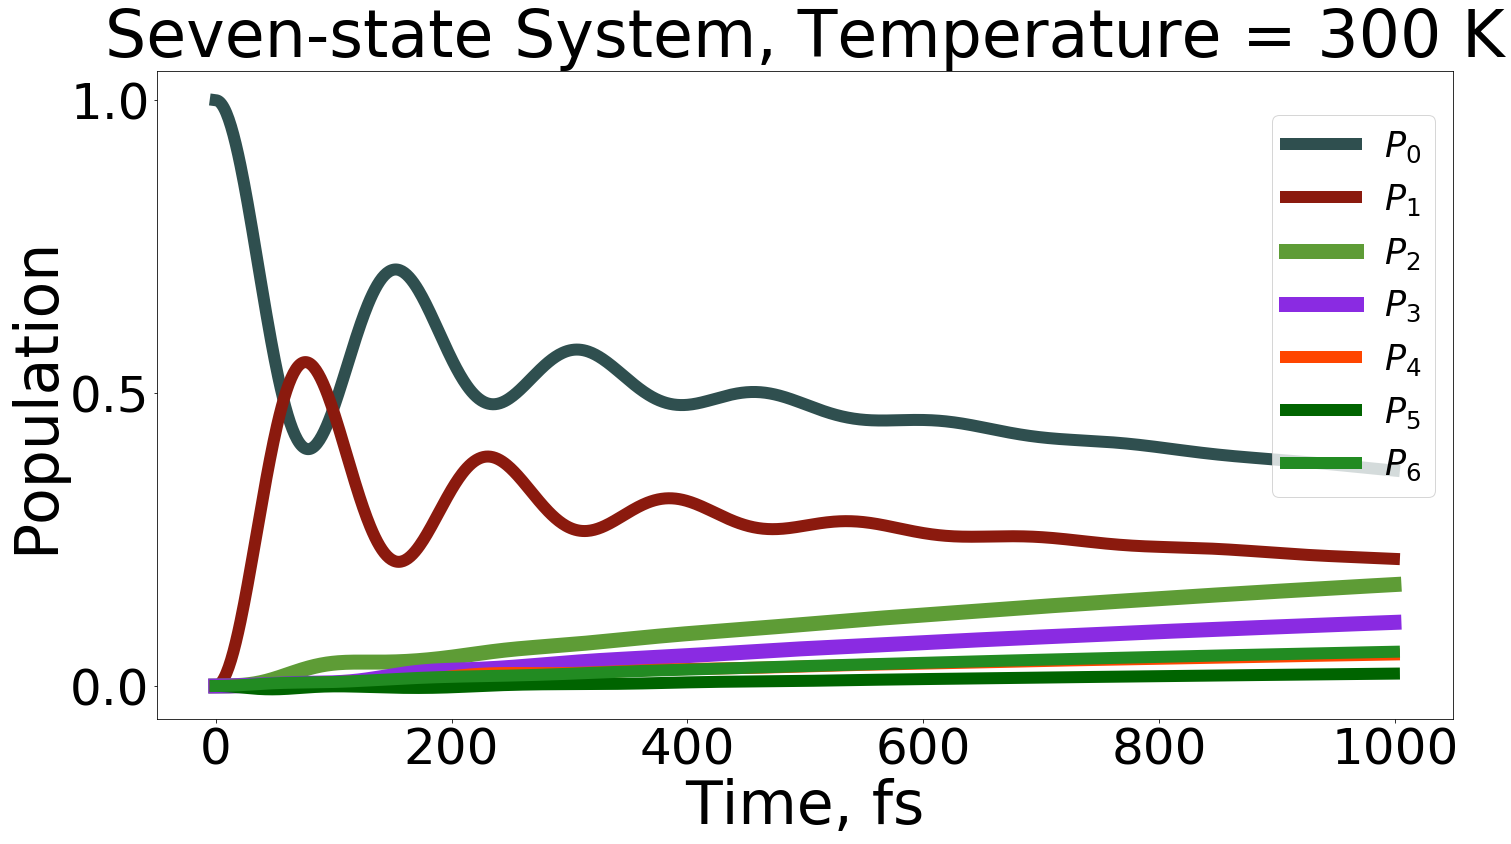

In [7]:
A = [ None, None ]

with h5py.File(F"out_T2/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"out_T2/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 1,1])

C = [ None, None ]

with h5py.File(F"out_T2/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 2,2])

D = [ None, None ]

with h5py.File(F"out_T2/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 3,3])

E = [ None, None ]

with h5py.File(F"out_T2/mem_data.hdf", 'r') as f:
    E[0] = list(f["time/data"][:] * units.au2fs)
    E[1] = list(f["denmat/data"][:, 4,4])

F = [ None, None ]

with h5py.File(F"out_T2/mem_data.hdf", 'r') as f:
    F[0] = list(f["time/data"][:] * units.au2fs)
    F[1] = list(f["denmat/data"][:, 5,5])

G = [ None, None ]

with h5py.File(F"out_T2/mem_data.hdf", 'r') as f:
    G[0] = list(f["time/data"][:] * units.au2fs)
    G[1] = list(f["denmat/data"][:, 6,6])

plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Seven-state System, Temperature = 300 K', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"$P_0$", linewidth=12, color = colors["41"])
plt.plot(B[0], B[1], label=f"$P_1$", linewidth=12, color = colors["11"], )
plt.plot(C[0], C[1], label=f"$P_2$", linewidth=15, color = colors["21"], )
plt.plot(D[0], D[1], label=f"$P_3$", linewidth=15, color = colors["31"], )
plt.plot(E[0], E[1], label=f"$P_4$", linewidth=12, color = colors["12"])
plt.plot(F[0], F[1], label=f"$P_5$", linewidth=12, color = colors["22"], )
plt.plot(G[0], G[1], label=f"$P_6$", linewidth=12, color = colors["23"], )
plt.legend(fontsize=35, loc='upper right', bbox_to_anchor=(1, 0.959))
plt.yticks(ticks=(0.0, 0.5, 1.0))
plt.show()
plt.close()